# Manipulación de datos con Pandas

[Pandas](http://pandas.pydata.org/)  es un paquete de Python que proporciona estructuras de datos similares a los dataframes de R. Pandas depende de Numpy, la librería que añade un potente tipo matricial a Python. Los principales tipos de datos que pueden representarse con pandas son:

> -   Datos tabulares con columnas de tipo heterogéneo con etiquetas en columnas y filas.
> -   Series temporales.

Pandas proporciona herramientas que permiten:

> -   leer y escribir datos en diferentes formatos: CSV, Microsoft Excel, bases SQL y formato HDF5
> -   seleccionar y filtrar de manera sencilla tablas de datos en función de posición, valor o etiquetas
> -   fusionar y unir datos
> -   transformar datos aplicando funciones tanto en global como por ventanas
> -   manipulación de series temporales
> -   hacer gráficas

En pandas existen tres tipos básicos de objetos todos ellos basados a su vez en Numpy:

> -   Series (listas, 1D),
> -   DataFrame (tablas, 2D) y
> -   Panels (tablas 3D).

In [1]:
import numpy as np
import pandas as pd

In [3]:
pd.__version__

'1.0.3'

## El objeto Series en pandas

A la izquierda del array están los índices (indexes), en este caso explícitos por no especificarlos.

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [8]:
type(data)

pandas.core.series.Series

In [9]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [10]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [11]:
data[1]

0.5

In [12]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Series como arrays de NumPy

In [14]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [15]:
data['a']

0.25

In [16]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series como diccionario especializado

In [17]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [18]:
population['California']

38332521

In [19]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Construyendo un objeto series

In [20]:
pd.Series(5, index=[100, 200, 300]) # extiende según índices

100    5
200    5
300    5
dtype: int64

## El objeto DataFrame en pandas

### DataFrame como una generalización del array de NumPy

In [21]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [25]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [34]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [35]:
states.columns

Index(['population', 'area'], dtype='object')

### DataFrames como diccionario especializado

In [40]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

### Construyendo DataFrames

#### Desde un objeto series

In [42]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### Desde una lista de diccionarios

In [47]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [46]:
pd.DataFrame([{'a': 0, 'b': 0}, {'c': 1, 'c': 2}, {'a': 2, 'b': 4}])

,a,b,c
0,0.0,0.0,NaN
1,NaN,NaN,2.0
2,2.0,4.0,NaN


#### Desde un diccionario de series

In [49]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### Desde un array bidimensional de numpy

In [51]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.399952,0.167661
b,0.930453,0.986641
c,0.122141,0.375102


#### Desde un array estructurado de numpy

In [52]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [53]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Los índices de pandas

In [55]:
ind = pd.Index([2, 3, 5, 7, 11]) # índices explícitos
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Índices como un array inmutable

In [56]:
ind[1]

3

In [57]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [58]:
ind[1] = 0 # dará error, ya que es INMUTABLE

TypeError: Index does not support mutable operations

### Índices como un conjunto ordenado

In [59]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [60]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [61]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [62]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

## Indexado de datos y selecciones

## Selección de datos en series

### Series como un diccionario

In [66]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [68]:
data['b'] # acceder por su índice

0.5

In [69]:
'a' in data

True

In [70]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [71]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Series como un array unidimensional

In [76]:
# slicing mediante el índice explícito o indicado
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [77]:
# slicing por entero implícito (si los índices no son números)
data[0:2]

a    0.25
b    0.50
dtype: float64

In [78]:
# usando máscaras
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [89]:
# solo pares
data[1::2] #esto no rula

b    0.5
d    1.0
dtype: float64

In [79]:
# mediante fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### Usando indexers: `loc` e `iloc`

In [90]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [91]:
# explicit index when indexing
data[1]

'a'

In [92]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Como esto es muy confuso, podremos usar los indexers:
- `loc`: Siempre hace referencia al índice explícito (el que no indicamos)

In [93]:
data.loc[1]

'a'

In [94]:
data.loc[1:3]

1    a
3    b
dtype: object

- `iloc`: Siempre hace referencia al índice implícito (el que indicamos al crear la serie)

In [95]:
data.iloc[1]

'b'

In [96]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Selección de datos en DataFrames

### DataFrames como diccionario

In [176]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [100]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [101]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [102]:
data.area is data['area']

True

In [103]:
data.pop is data['pop']

False

In [177]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [122]:
data.reindex(columns=['density','area', 'pop']) # esto no tiene que ver pero mola

,density,area,pop
California,90.413926,423967,38332521
Texas,38.018740,695662,26448193
New York,139.076746,141297,19651127
Florida,114.806121,170312,19552860
Illinois,85.883763,149995,12882135


In [123]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### DataFrame como array bidimensional

In [110]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [112]:
data.T # hacemos un swap de filas y columnas

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [114]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [115]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [117]:
data['area']['California']

423967

In [121]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [119]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [128]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [129]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [139]:
data.loc['California','density'] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [179]:
data['pop'] *= 0.9
data

,area,pop,density
California,423967,34499268.9,90.413926
Texas,695662,23803373.7,38.018740
New York,141297,17686014.3,139.076746
Florida,170312,17597574.0,114.806121
Illinois,149995,11593921.5,85.883763


### Indexado adicional por convenio

In [124]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [125]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [126]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# Ejercicio: Dataset de titanic

In [186]:
titanic = pd.read_csv( 'titanic.csv')

In [189]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [190]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [191]:
# Filtrar rows con gente que pagó menos de $7

In [197]:
titanic[titanic['Fare'] < 7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S


In [207]:
# Sólo nos interesa nombre y edad

In [206]:
titanic[titanic['Fare'] < 7][['Name','Age']]

,Name,Age
129,"Ekstrom, Mr. Johan",45.0
143,"Burke, Mr. Jeremiah",19.0
179,"Leonard, Mr. Lionel",36.0
202,"Johanson, Mr. Jakob Alfred",34.0
263,"Harrison, Mr. William",40.0
271,"Tornquist, Mr. William Henry",25.0
277,"Parkes, Mr. Francis ""Frank""",NaN
302,"Johnson, Mr. William Cahoone Jr",19.0
326,"Nysveen, Mr. Johan Hansen",61.0
371,"Wiklund, Mr. Jakob Alfred",18.0


In [209]:
# Podemos ordenar la vista:

titanic[titanic['Fare'] < 7][['Name','Age','Fare']].sort_values('Fare', ascending=False)

,Name,Age,Fare
129,"Ekstrom, Mr. Johan",45.0,6.9750
804,"Hedman, Mr. Oskar Arvid",27.0,6.9750
825,"Flynn, Mr. John",NaN,6.9500
411,"Hart, Mr. Henry",NaN,6.8583
654,"Hegarty, Miss. Hanora ""Nora""",18.0,6.7500
143,"Burke, Mr. Jeremiah",19.0,6.7500
202,"Johanson, Mr. Jakob Alfred",34.0,6.4958
371,"Wiklund, Mr. Jakob Alfred",18.0,6.4958
818,"Holm, Mr. John Fredrik Alexander",43.0,6.4500
843,"Lemberopolous, Mr. Peter L",34.5,6.4375


In [210]:
# Incluso con ordenaciones secundarias:

titanic[titanic['Fare'] < 7][['Name','Age','Fare']].sort_values(['Age', 'Fare'])

,Name,Age,Fare
371,"Wiklund, Mr. Jakob Alfred",18.0,6.4958
654,"Hegarty, Miss. Hanora ""Nora""",18.0,6.7500
302,"Johnson, Mr. William Cahoone Jr",19.0,0.0000
143,"Burke, Mr. Jeremiah",19.0,6.7500
378,"Betros, Mr. Tannous",20.0,4.0125
271,"Tornquist, Mr. William Henry",25.0,0.0000
804,"Hedman, Mr. Oskar Arvid",27.0,6.9750
872,"Carlsson, Mr. Frans Olof",33.0,5.0000
202,"Johanson, Mr. Jakob Alfred",34.0,6.4958
843,"Lemberopolous, Mr. Peter L",34.5,6.4375


In [211]:
# De la gente que sobrevivió, cuál era la media de edad

In [218]:
titanic[titanic['Survived'] == 1]['Age'].mean()

28.343689655172415

## Operando los datos en Pandas

In [2]:
import pandas as pd
import numpy as np

### Ufuncs: Preservación de los índices

In [3]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [4]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [5]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [6]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### Ufuncs: Alineación de los índices

In [9]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
area

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [10]:
population

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [16]:
population / area # aparecen NaN y se cambia el tipo de float64, ya que NaN no existe en int

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [13]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [14]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [21]:
res = A.add(B, fill_value=0) # Los valores que faltan se rellenan con 0

In [22]:
res

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [24]:
res.convert_dtypes()

0    2
1    5
2    9
3    5
dtype: Int64

### Alineamiento de los índices en un DataFrame

In [29]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,19,2
1,4,18


In [30]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,6,4,8
1,6,1,3
2,8,1,9


In [31]:
A + B

,A,B,C
0,23.0,8.0,NaN
1,5.0,24.0,NaN
2,NaN,NaN,NaN


In [35]:
A.stack()

0  A    19
   B     2
1  A     4
   B    18
dtype: int64

In [34]:
fill = A.stack().mean() # stack crea multi-índices
A.add(B, fill_value=fill)

,A,B,C
0,23.00,8.00,18.75
1,5.00,24.00,13.75
2,11.75,18.75,19.75


**Operadores de métodos:**

- `+`	add()
- `-`	sub(), subtract()
- `*`	mul(), multiply()
- `/`	truediv(), div(), divide()
- `//`	floordiv()
- `%`	mod()
- `**`	pow()

### Operando DataFrames con Series

In [36]:
A = rng.randint(10, size=(3, 4))
A

array([[8, 9, 4, 1],
       [3, 6, 7, 2],
       [0, 3, 1, 7]])

In [37]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-5, -3,  3,  1],
       [-8, -6, -3,  6]])

In [39]:
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,8,9,4,1
1,3,6,7,2
2,0,3,1,7


In [40]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-5,-3,3,1
2,-8,-6,-3,6


In [41]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-1,0,-5,-8
1,-3,0,1,-4
2,-3,0,-2,4


In [42]:
halfrow = df.iloc[0, ::2]
halfrow

Q    8
S    4
Name: 0, dtype: int64

In [43]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-5.0,NaN,3.0,NaN
2,-8.0,NaN,-3.0,NaN


## Manejo de los datos perdidos u omitidos

## Datos perdidos en Pandas

Pandas acaba usando NaN desde el punto de vista de float y el objeto None de Python

### `None`: Datos perdidos pythónicos

In [45]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [46]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
49.7 ms ± 3.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.52 ms ± 6.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [48]:
vals1.max() # no puede calcular el máximo con el None

TypeError: '>=' not supported between instances of 'int' and 'NoneType'

### `NaN`: Pérdidas de datos numéricos

In [49]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [50]:
1 + np.nan

nan

In [51]:
0 *  np.nan

nan

In [52]:
vals2.sum(), vals2.min(), vals2.max() # al menos no da error

(nan, nan, nan)

In [53]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [54]:
np.nan == np.nan

False

### `NaN` y `None` en Pandas

In [55]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [56]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

## Tipo de dato entero nulable
**Fuente:** https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html

Desde hace poco todos los dtypes propios de panda (tip, los que empiezan en mayúscula) saben interpretar un NA.

In [58]:
pd.NA

<NA>

In [60]:
arr = pd.array([1, 2, None], dtype=pd.Int64Dtype())
arr

<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int64

In [61]:
pd.array([1, 2, np.nan], dtype="Int64")

<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int64

In [62]:
pd.array([1, 2, np.nan, None, pd.NA], dtype="Int64")

<IntegerArray>
[1, 2, <NA>, <NA>, <NA>]
Length: 5, dtype: Int64

In [63]:
pd.Series(arr)

0       1
1       2
2    <NA>
dtype: Int64

### Operaciones

In [66]:
s = pd.Series([1, 2, None], dtype="Int64")
s + 1

0       2
1       3
2    <NA>
dtype: Int64

In [67]:
s == 1

0     True
1    False
2     <NA>
dtype: boolean

In [68]:
s.iloc[1:3]

1       2
2    <NA>
dtype: Int64

In [70]:
s + s.iloc[1:3].astype('Int8') # suma con otros dtype's

0    <NA>
1       4
2    <NA>
dtype: Int64

In [72]:
s + 0.01 # aquí pasamos a coma flotante y volvemos a cambiar el dtype

0    1.01
1    2.01
2     NaN
dtype: float64

In [73]:
df = pd.DataFrame({'A': s, 'B': [1, 1, 3], 'C': list('aab')})
df

,A,B,C
0,1,1,a
1,2,1,a
2,<NA>,3,b


In [74]:
df.dtypes

A     Int64
B     int64
C    object
dtype: object

Se pueden hacer multitud de operaciones y el dtype no varía.

In [75]:
pd.concat([df[['A']], df[['B', 'C']]], axis=1).dtypes

A     Int64
B     int64
C    object
dtype: object

In [76]:
df.sum()

A      3
B      5
C    aab
dtype: object

In [78]:
df.groupby('B').A.sum() # agrupamos

B
1    3
3    0
Name: A, dtype: Int64

### Valores `NA` escalares

In [79]:
a = pd.array([1, None], dtype="Int64")

In [80]:
a

<IntegerArray>
[1, <NA>]
Length: 2, dtype: Int64

In [81]:
a[1]

<NA>

## Operaciones con valores nulos

- `isnull()`: Generate a boolean mask indicating missing values
- `notnull()`: Opposite of isnull()
- `dropna()`: Return a filtered version of the data
- `fillna()`: Return a copy of the data with missing values filled or imputed

### Detectando valores nulos

In [88]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [83]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [84]:
data[data.notnull()]

0        1
2    hello
dtype: object

### Dropeando los valores nulos

In [86]:
data.dropna()

0        1
2    hello
dtype: object

In [87]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [89]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [91]:
df.dropna(axis='columns') # axis=1

,2
0,2
1,5
2,6


¿Quieres dropear las filas/columnas que sean mayoritaritamenter NA?

In [92]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [93]:
df.dropna(axis='columns', how='all') # how es cómo se los quita

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [96]:
df.dropna(axis='rows', thresh=3) # valores mínimos para que la columna sea mantenida

,0,1,2,3
1,2.0,3.0,5,NaN


In [99]:
df.dropna(axis='columns', thresh=2)

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


### Rellenando los valores nulos

In [100]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [101]:
data.fillna(0) # rellenamos con 0

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [104]:
# forward-fill -> Se propaga como si se derramara, es decir, copia el valor de arriba del nan
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [105]:
# back-fill -> Se propaga hacia arriba y no hacia abajo
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [106]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [107]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Recuerda que para el fillna se intercambian las filas y las columnas.

In [113]:
df.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,4.0,4.0,6.0,6.0


## Ejemplo

In [167]:
titanic = pd.read_csv('titanic.csv')

In [116]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Sacar la media de edad pero contando que los NA son 0.

In [117]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [118]:
titanic['Age'].mean()

29.69911764705882

In [119]:
titanic['Age'].fillna(0).mean()

23.79929292929293

In [121]:
titanic['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

Lo mismo pero con máscaras booleanas

In [139]:
mask = titanic['Age'].notna()
titanic[mask]['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [140]:
titanic['Age'][titanic['Age'].notnull()]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

Rellenar los NA de Cabin, primero de arriba a abajo y luego a la inversa.

In [147]:
titanic['Cabin'].ffill().bfill()

0       C85
1       C85
2       C85
3      C123
4      C123
       ... 
886     C50
887     B42
888     B42
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

In [172]:
pd.concat( [titanic.drop('Cabin',axis=1), titanic['Cabin'].ffill().bfill()],axis=1).reindex(columns=titanic.columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Indexado jerárquico o multi-índice

### La forma incorrecta

In [3]:
import pandas as pd
import numpy as np

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [4]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [5]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### La mejor forma: Panda MultiIndexes

In [6]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [7]:
pop = pop.reindex(index) # volvemos a pasarle el index
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [8]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [9]:
pop['California']

2000    33871648
2010    37253956
dtype: int64

In [10]:
pop.loc['California', :]

California  2000    33871648
            2010    37253956
dtype: int64

### MultiÍndice como una dimensión extra

In [11]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Al hacer el stack vemos como se han "apilado" y hemos convertido una dimensión en un índice.

In [12]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [14]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [13]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [16]:
pop_df.stack()
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [17]:
stk = pop_df.stack()

In [18]:
stk.loc['California', 2000]

total      33871648
under18     9267089
dtype: int64

In [20]:
stk.loc['California']

2000  total      33871648
      under18     9267089
2010  total      37253956
      under18     9284094
dtype: int64

In [26]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [30]:
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Formas de crear multi-índices

Mediante listas

In [32]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.243271  0.153653
  2  0.164774  0.081205
b 1  0.440785  0.251691
  2  0.891193  0.307242

Mediante un diccionario

In [33]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

## Constructores de multi-índices explítitos

In [35]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [36]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [37]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### Nombres de niveles de multi-índices

In [39]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multi-índice por columnas

In [42]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
index

MultiIndex([(2013, 1),
            (2013, 2),
            (2014, 1),
            (2014, 2)],
           names=['year', 'visit'])

In [43]:
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

columns

MultiIndex([(  'Bob',   'HR'),
            (  'Bob', 'Temp'),
            ('Guido',   'HR'),
            ('Guido', 'Temp'),
            (  'Sue',   'HR'),
            (  'Sue', 'Temp')],
           names=['subject', 'type'])

In [46]:
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
data

array([[42. , 36.9, 37. , 34.9, 26. , 37.1],
       [45. , 37.4, 30. , 38.6, 46. , 37.7],
       [46. , 37.3, 41. , 35.9, 42. , 37.3],
       [32. , 36.3, 34. , 38.2, 36. , 37.3]])

In [45]:
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  37.6  36.0  37.7  24.0  39.7
     2      36.0  36.1  27.0  37.3  40.0  36.5
2014 1      31.0  37.7  65.0  36.9  22.0  36.7
     2      30.0  36.9  37.0  39.3  40.0  37.3

In [47]:
health_data.stack()

subject           Bob  Guido   Sue
year visit type                   
2013 1     HR    43.0   36.0  24.0
           Temp  37.6   37.7  39.7
     2     HR    36.0   27.0  40.0
           Temp  36.1   37.3  36.5
2014 1     HR    31.0   65.0  22.0
           Temp  37.7   36.9  36.7
     2     HR    30.0   37.0  40.0
           Temp  36.9   39.3  37.3

In [56]:
health_data.stack().stack().to_csv('blah.csv') # se puede guardar en csv

In [57]:
!head blah.csv

year,visit,type,subject,0
2013,1,HR,Bob,43.0
2013,1,HR,Guido,36.0
2013,1,HR,Sue,24.0
2013,1,Temp,Bob,37.6
2013,1,Temp,Guido,37.7
2013,1,Temp,Sue,39.7
2013,2,HR,Bob,36.0
2013,2,HR,Guido,27.0
2013,2,HR,Sue,40.0


In [58]:
!rm blah.csv

In [59]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  37.6  36.0  37.7  24.0  39.7
     2      36.0  36.1  27.0  37.3  40.0  36.5
2014 1      31.0  37.7  65.0  36.9  22.0  36.7
     2      30.0  36.9  37.0  39.3  40.0  37.3

In [60]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      36.0  37.7
     2      27.0  37.3
2014 1      65.0  36.9
     2      37.0  39.3

## Indexando y haciendo slicing al multi-índice

### Multiplicando índices de series

In [61]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [62]:
pop['California', 2000]

33871648

In [63]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [64]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [65]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [66]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [68]:
pop[['California', 'Texas']] # fancy indexing

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiplicar dataframes indexados

In [69]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  37.6  36.0  37.7  24.0  39.7
     2      36.0  36.1  27.0  37.3  40.0  36.5
2014 1      31.0  37.7  65.0  36.9  22.0  36.7
     2      30.0  36.9  37.0  39.3  40.0  37.3

In [70]:
health_data['Guido', 'HR']

year  visit
2013  1        36.0
      2        27.0
2014  1        65.0
      2        37.0
Name: (Guido, HR), dtype: float64

In [71]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      43.0  37.6
     2      36.0  36.1

In [72]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        43.0
      2        36.0
2014  1        31.0
      2        30.0
Name: (Bob, HR), dtype: float64

Cuál es el HR de todo el mundo en su primera visita?

In [73]:
health_data.loc[(:, 1), (:, 'HR')] # esto no funcionará

SyntaxError: invalid syntax (<ipython-input-73-fb34fa30ac09>, line 1)

Para poder hacerlo necesitamos usar el indexslice:

In [76]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,43.0,36.0,24.0
2014,1,31.0,65.0,22.0


## Reorganizando Multi-índice

Muchas operacioens con multiíndices fallarán si el índice no está ordenado.

### Índices ordenados y desordenados

In [77]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.298361
      2      0.124866
c     1      0.776274
      2      0.279319
b     1      0.143577
      2      0.219218
dtype: float64

In [80]:
data['a':'b'] # da error al no estar en orden

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [81]:
data = data.sort_index() # ordenamos
data

char  int
a     1      0.298361
      2      0.124866
b     1      0.143577
      2      0.219218
c     1      0.776274
      2      0.279319
dtype: float64

In [82]:
data['a':'b']

char  int
a     1      0.298361
      2      0.124866
b     1      0.143577
      2      0.219218
dtype: float64

### Stackeando y desstackeando índices

In [88]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [90]:
pop.unstack() # (level= -1, el nivel más interno)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [91]:
pop.unstack(level=0) # el siguiente nivel

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [92]:
pop.unstack(level=1) # el siguiente nivel x2

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [86]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Asignar y resetear índices

In [95]:
pop_flat = pop.reset_index(name='population') # reset index pasa los índices a columnas
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [96]:
pop_flat.set_index(['state', 'year']) # pasamos las columnas a índices

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [105]:
# Ejemplo:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
titanic.set_index(['PassengerId'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [111]:
titanic = titanic.set_index(['Pclass','Survived']).sort_index()

## Agregando datos a multi-índices

In [98]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  37.6  36.0  37.7  24.0  39.7
     2      36.0  36.1  27.0  37.3  40.0  36.5
2014 1      31.0  37.7  65.0  36.9  22.0  36.7
     2      30.0  36.9  37.0  39.3  40.0  37.3

In [118]:
data_mean = health_data.mean(level='year') # hace medias en subíndice(axis=0) y agrupa por año
data_mean

subject   Bob        Guido         Sue      
type       HR   Temp    HR  Temp    HR  Temp
year                                        
2013     39.5  36.85  31.5  37.5  32.0  38.1
2014     30.5  37.30  51.0  38.1  31.0  37.0

In [117]:
data_mean.mean(axis=1, level='type') # vuelve a hacer media
#esta vez en columnas dejando el tipo # axis=1 es en horizontal

type,HR,Temp
year,,
2013,34.333333,37.483333
2014,37.500000,37.466667


In [114]:
titanic['Fare'].mean(level='Pclass')

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

## Combinando datos con append y concat

In [119]:
import pandas as pd
import numpy as np

In [120]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [122]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Recall: Concatenando arrays de numpy

In [123]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [124]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Concatenando con `pd.concat`

In [129]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [130]:
pd.concat([ser2, ser1])

4    D
5    E
6    F
1    A
2    B
3    C
dtype: object

In [134]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])') # por defecto es row-wise

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [136]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')") # concatena por columnas

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### Duplicando índices

In [137]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


#### Capturando las repeticiones como errores

In [138]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


#### Ignorando los índices

In [139]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [140]:
pd.concat([y, x], ignore_index=True)

,A,B
0,A2,B2
1,A3,B3
2,A0,B0
3,A1,B1


In [141]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

### Concatenando con Joins

In [142]:
df5 = make_df('ABC', [1, 2]) 
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

`join='inner'` hace como una intersección. Las columnas con datos que no casan, hacemos un drop.

In [144]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')") # por defecto es 'outer'

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

### El método `append()`

In [146]:
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


## Combinando Datasets: Merge y Join

In [147]:
pd.merge

<function pandas.core.reshape.merge.merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'>

In [148]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Categorías de Joins

Para ver el tipo de join, se mira la columna que tienen en común y los datos dentro

### Joins uno-a-uno

In [149]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [150]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Joins uno-a-muchos

El join se hace de forma inteligente usando el merge.

In [151]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### Joins muchos-a-muchos

Cada grupo tiene sus propias skills

In [153]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


In [157]:
# Ejercicios: jugamos con el dataset

In [155]:
pd.merge(df1, df5).stack()

0  employee             Bob
   group         Accounting
   skills              math
1  employee             Bob
   group         Accounting
   skills      spreadsheets
2  employee            Jake
   group        Engineering
   skills            coding
3  employee            Jake
   group        Engineering
   skills             linux
4  employee            Lisa
   group        Engineering
   skills            coding
5  employee            Lisa
   group        Engineering
   skills             linux
6  employee             Sue
   group                 HR
   skills      spreadsheets
7  employee             Sue
   group                 HR
   skills      organization
dtype: object

In [156]:
pd.merge(df1, df5).set_index('employee')

,group,skills
employee,,
Bob,Accounting,math
Bob,Accounting,spreadsheets
Jake,Engineering,coding
Jake,Engineering,linux
Lisa,Engineering,coding
Lisa,Engineering,linux
Sue,HR,spreadsheets
Sue,HR,organization


## Especifizando la "key merge"

### La keyword `on`

Especificamos la columna común para hacer el join.

In [158]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### Las keywords `left_on` y `right_on`

Podemos forzar el join con columnas comunes pero con distinto nombre, usando las keywords indicadas.

In [161]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [162]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Las keywords `left_index` y `right_index`

Podemos usar los índices para juntar las tablas.

In [163]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [164]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [165]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


Se pueden mezclar las keywords:

In [166]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

In [171]:
pd.merge(df1a, df3, left_index=True, right_on='name').set_index('name')

,group,salary
name,,
Bob,Accounting,70000
Jake,Engineering,80000
Lisa,Engineering,120000
Sue,HR,90000


In [172]:
dfx = pd.merge(df1a, df3, left_index=True, right_on='name').set_index('name')

Cuánto cobra el que más cobra del dpto de ingeniería?

In [173]:
dfx

,group,salary
name,,
Bob,Accounting,70000
Jake,Engineering,80000
Lisa,Engineering,120000
Sue,HR,90000


In [184]:
dfx[dfx['group'] == 'Engineering']['salary'].max()

120000

In [189]:
dfx[dfx['group'] == 'Engineering'].sort_values('salary', ascending=False).head(1)['salary']

name
Lisa    120000
Name: salary, dtype: int64

## Especificando arimética de conjuntos para los Joins

In [190]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [195]:
pd.merge(df6, df7, how='inner') # con how podemos cambiar el tipo de join
# default = inner

,name,food,drink
0,Mary,bread,wine


In [193]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [197]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')") # conserva las de la izq

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

## Haciendo overlapping con los nombres de columnas: La keyword `suffixes`

In [200]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")') #pone unos sufijos estandar

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [201]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')
# indicas el sufijo

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

## Ejemplo: USA Data

In [203]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   1569      0 --:--:-- --:--:-- --:--:--  1566
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   1680      0 --:--:-- --:--:-- --:--:--  1680


In [204]:
!ls

01-IPython.ipynb	      populations.txt	     state-areas.csv
02-NumPy.ipynb		      president_heights.csv  state-population.csv
03-Pandas.ipynb		      Seattle2014.csv	     titanic.csv
Numpy_Python_Cheat_Sheet.pdf  state-abbrevs.csv


In [221]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [222]:
display('pop.describe()', 'areas.describe()', 'abbrevs.describe()')

pop.describe()
              year    population
count  2544.000000  2.524000e+03
mean   2001.500000  6.805558e+06
std       6.923547  2.855014e+07
min    1990.000000  1.013090e+05
25%    1995.750000  7.423805e+05
50%    2001.500000  1.597005e+06
75%    2007.250000  4.547104e+06
max    2013.000000  3.161288e+08

areas.describe()
       area (sq. mi)
count      52.000000
mean    72892.288462
std     95415.854873
min        68.000000
25%     34542.000000
50%     55375.500000
75%     83906.500000
max    656425.000000

abbrevs.describe()
           state abbreviation
count         51           51
unique        51           51
top     New York           PA
freq           1            1

In [223]:
# Densidad de población under18 en Delawere en 2005

In [224]:
pop_abbr = pd.merge(pop,abbrevs, left_on='state/region', right_on='abbreviation')

In [225]:
pop_abbr

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming,WY
2444,WY,total,1991,459260.0,Wyoming,WY
2445,WY,under18,1991,136720.0,Wyoming,WY
2446,WY,under18,1990,136078.0,Wyoming,WY


In [226]:
dtc = pd.merge(pop_abbr, areas).drop('state/region', axis=1)

In [227]:
dtc = dtc.drop('abbreviation', axis=1)

In [231]:
dtc

,ages,year,population,state,area (sq. mi)
0,under18,2012,1117489.0,Alabama,52423
1,total,2012,4817528.0,Alabama,52423
2,under18,2010,1130966.0,Alabama,52423
3,total,2010,4785570.0,Alabama,52423
4,under18,2011,1125763.0,Alabama,52423
...,...,...,...,...,...
2443,under18,1993,137458.0,Wyoming,97818
2444,total,1991,459260.0,Wyoming,97818
2445,under18,1991,136720.0,Wyoming,97818
2446,under18,1990,136078.0,Wyoming,97818


In [238]:
dtc['density'] = dtc['population'] / dtc['area (sq. mi)']

In [255]:
dtc.describe()

,year,population,area (sq. mi),density
count,2448.000000,2.448000e+03,2448.000000,2448.000000
mean,2001.500000,3.494881e+06,74252.627451,196.113413
std,6.923601,5.011334e+06,94929.655186,867.890113
min,1990.000000,1.013090e+05,68.000000,0.270407
25%,1995.750000,7.282355e+05,35387.000000,14.959247
50%,2001.500000,1.557804e+06,56276.000000,42.937022
75%,2007.250000,4.406263e+06,84904.000000,111.476344
max,2013.000000,3.833252e+07,656425.000000,9506.602941


In [241]:
#ejercicio sin acabar, seguimos la explicación

In [242]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [243]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [244]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [245]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [246]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [247]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [248]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [249]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [250]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [251]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [252]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [253]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [254]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Agregaciones y agrupaciones (group bys de SQL)

In [1]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Datos de Planetas

In [3]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [5]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## Agregación simple en pandas

In [6]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [7]:
ser.sum()

2.811925491708157

In [8]:
ser.mean()

0.5623850983416314

In [9]:
# Dataframe

In [10]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [11]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [12]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [13]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: Split, Apply y Combine

In [14]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [16]:
df.groupby('key') #objeto intermedio "lazy"

In [17]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### El objeto GroupBy

#### Indexado por columnas

In [18]:
planets.groupby('method')

In [22]:
planets.groupby('method')['number'].sum()

method
Astrometry                         2
Eclipse Timing Variations         15
Imaging                           50
Microlensing                      27
Orbital Brightness Modulation      5
Pulsar Timing                     11
Pulsation Timing Variations        1
Radial Velocity                  952
Transit                          776
Transit Timing Variations          9
Name: number, dtype: int64

#### Iteración sobre grupos

In [27]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} period={1}".format(method, group['orbital_period'].median()))

Astrometry                     period=631.1800000000001
Eclipse Timing Variations      period=4343.5
Imaging                        period=27500.0
Microlensing                   period=3300.0
Orbital Brightness Modulation  period=0.342887
Pulsar Timing                  period=66.5419
Pulsation Timing Variations    period=1170.0
Radial Velocity                period=360.2
Transit                        period=5.714932
Transit Timing Variations      period=57.011


#### Dispatch methods

In [29]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


### Agregar, filtrar, transformar y aplicar

In [30]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [31]:
df.groupby('key').aggregate(['min', np.median, max]) #lista de funciones a aplicar

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [32]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'}) # podemos incluso mapear

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtrando

In [34]:
def filter_func(x):
    return x['data2'].std() > 4 # retorna booleano

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")


df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

#### Transformación

In [35]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [36]:
titanic = sns.load_dataset('titanic')

In [37]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
titanic.groupby('pclass')

In [62]:
# media de lo que pagaron los supervivientes y no supervivientes

def filter_func(x):
    return x['fare'] > 100

titanic.groupby('survived')['fare'].mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

#### El método apply()

In [63]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


### Ejemplo de agrupaciones

In [64]:
planets['year']

0       2006
1       2008
2       2011
3       2007
4       2009
        ... 
1030    2006
1031    2007
1032    2007
1033    2008
1034    2008
Name: year, Length: 1035, dtype: int64

In [65]:
decade = 10 * (planets['year'] // 10)

In [67]:
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Tablas Pivotantes

### A mano

In [68]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [70]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Usando Pivot table

In [71]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Tablas dinámicas multinivel

In [72]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [73]:
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [74]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [75]:
# Ejercicio: % de hombres y mujeres tenían sibsp

In [78]:
titanic.pivot_table('fare', index='sex', columns='pclass') #rango valores y cosas a enfrentar

pclass,1,2,3
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


## Ejemplo: Birthrate data

In [79]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   673k      0 --:--:-- --:--:-- --:--:--  671k


In [80]:
births = pd.read_csv('births.csv')

In [83]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [86]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


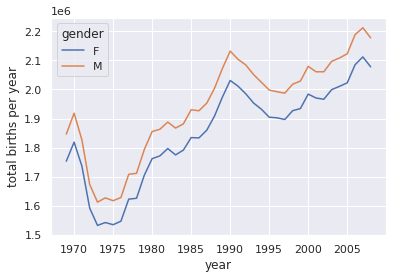

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');
